<a href="https://colab.research.google.com/github/dheeraj198/Crop-predication/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
tf.keras.applications.vgg16.preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
#import matplotlib.pyplot as plttf.__version__

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
fid = drive.ListFile({'q':"title='test_set.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('test_set.zip')

In [8]:
!unzip test_set.zip

Archive:  test_set.zip
   creating: test_set/
  inflating: test_set/a.jpg          
  inflating: test_set/b.jpg          
   creating: test_set/jute/
  inflating: test_set/jute/jute001a.jpeg  
  inflating: test_set/jute/jute002a.jpeg  
  inflating: test_set/jute/jute003a.jpeg  
  inflating: test_set/jute/jute004a.jpeg  
  inflating: test_set/jute/jute005a.jpeg  
  inflating: test_set/jute/jute006a.jpeg  
  inflating: test_set/jute/jute007a.jpeg  
  inflating: test_set/jute/jute008a.jpeg  
  inflating: test_set/jute/jute009a.jpeg  
  inflating: test_set/jute/jute010a.jpeg  
  inflating: test_set/jute/jute011a.jpeg  
  inflating: test_set/jute/jute012a.jpeg  
  inflating: test_set/jute/jute013a.jpeg  
  inflating: test_set/jute/jute014a.jpeg  
  inflating: test_set/jute/jute015a.jpeg  
  inflating: test_set/jute/jute016a.jpeg  
  inflating: test_set/jute/jute017a.jpeg  
  inflating: test_set/jute/jute018a.jpeg  
  inflating: test_set/jute/jute019a.jpeg  
  inflating: test_set/jute/jute02

In [9]:
fid = drive.ListFile({'q':"title='train_set.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('train_set.zip')

In [10]:
!unzip train_set.zip

Archive:  train_set.zip
   creating: train_set/
   creating: train_set/jute/
  inflating: train_set/jute/jute001a.jpeg  
  inflating: train_set/jute/jute001ahf.jpeg  
  inflating: train_set/jute/jute001ahs.jpeg  
  inflating: train_set/jute/jute001arot.jpeg  
  inflating: train_set/jute/jute002a.jpeg  
  inflating: train_set/jute/jute002ahf.jpeg  
  inflating: train_set/jute/jute002ahs.jpeg  
  inflating: train_set/jute/jute002arot.jpeg  
  inflating: train_set/jute/jute003a.jpeg  
  inflating: train_set/jute/jute003ahf.jpeg  
  inflating: train_set/jute/jute003ahs.jpeg  
  inflating: train_set/jute/jute003arot.jpeg  
  inflating: train_set/jute/jute004a.jpeg  
  inflating: train_set/jute/jute004ahf.jpeg  
  inflating: train_set/jute/jute004ahs.jpeg  
  inflating: train_set/jute/jute004arot.jpeg  
  inflating: train_set/jute/jute005a.jpeg  
  inflating: train_set/jute/jute005ahf.jpeg  
  inflating: train_set/jute/jute005ahs.jpeg  
  inflating: train_set/jute/jute005arot.jpeg  
  inflat

In [11]:
import pathlib
dataset_url = "/content/train_set"
test_url ="/content/test_set"

In [12]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
# re-size all the images to this
IMAGE_SIZE = [180, 180]

In [15]:
import tensorflow
VGG16 =tensorflow.keras.applications.VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 0s 0us/step


In [16]:
# don't train existing weights
for layer in VGG16.layers:
    layer.trainable = False


In [17]:
# our layers - you can add more if you want
x = Flatten()(VGG16.output)


In [18]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=VGG16.input, outputs=prediction)

In [19]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(dataset_url,
                                                 target_size = (180,180),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 804 images belonging to 5 classes.


In [22]:
test_set = test_datagen.flow_from_directory(test_url,
                                            target_size = (180, 180),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 201 images belonging to 5 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
26/26 [==============================] - 320s 12s/step - loss: 1.5332 - accuracy: 0.3436 - val_loss: 0.8169 - val_accuracy: 0.6716
Epoch 2/5
26/26 [==============================] - 319s 12s/step - loss: 0.7616 - accuracy: 0.7584 - val_loss: 0.5045 - val_accuracy: 0.9005
Epoch 3/5
26/26 [==============================] - 318s 12s/step - loss: 0.5379 - accuracy: 0.8593 - val_loss: 0.3710 - val_accuracy: 0.9254
Epoch 4/5
26/26 [==============================] - 318s 12s/step - loss: 0.4079 - accuracy: 0.9054 - val_loss: 0.2888 - val_accuracy: 0.9751
Epoch 5/5
26/26 [==============================] - 318s 12s/step - loss: 0.3395 - accuracy: 0.9617 - val_loss: 0.2421 - val_accuracy: 0.9652


In [24]:
import os
import matplotlib.pyplot as plt
os.makedirs('modal')

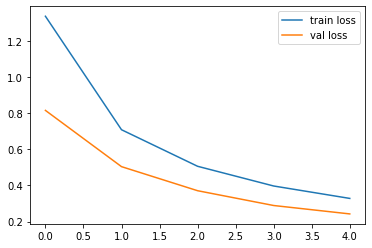

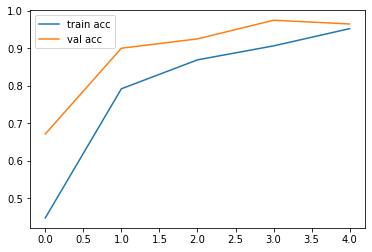

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import load_model

model.save('/content/modals/VGG16.h5')

In [27]:
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[0.03899329, 0.17528062, 0.01141229, 0.7729524 , 0.00136142],
       [0.04696294, 0.1275126 , 0.15076634, 0.39131775, 0.2834404 ],
       [0.7766861 , 0.05928914, 0.06843107, 0.07100131, 0.02459247],
       ...,
       [0.08100142, 0.4363417 , 0.28727007, 0.11733876, 0.07804806],
       [0.09901461, 0.81517404, 0.0273337 , 0.05637604, 0.00210164],
       [0.37478375, 0.22910514, 0.11045737, 0.2505761 , 0.03507761]],
      dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([3, 3, 0, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 0, 4, 4, 2, 1,
       0, 1, 4, 0, 0, 2, 4, 1, 0, 3, 4, 1, 1, 3, 0, 3, 3, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 0, 1, 0, 3, 2, 0, 2, 3, 4, 3, 3, 2, 3, 3, 1, 2, 3,
       4, 3, 1, 3, 4, 1, 1, 2, 2, 4, 1, 4, 0, 2, 4, 3, 3, 1, 1, 2, 3, 1,
       3, 4, 4, 1, 4, 0, 1, 2, 2, 3, 0, 0, 3, 1, 3, 3, 2, 1, 1, 0, 2, 2,
       4, 1, 4, 4, 4, 1, 2, 0, 1, 0, 4, 4, 0, 4, 4, 0, 4, 3, 4, 2, 3, 2,
       4, 2, 2, 2, 3, 0, 1, 4, 4, 4, 4, 4, 2, 0, 4, 0, 2, 1, 2, 2, 0, 0,
       2, 3, 1, 1, 4, 0, 0, 0, 3, 1, 2, 3, 3, 4, 2, 1, 4, 1, 4, 0, 1, 1,
       2, 0, 1, 0, 4, 3, 0, 3, 0, 4, 3, 1, 0, 2, 0, 2, 0, 1, 4, 0, 2, 2,
       1, 1, 0])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(test_set.classes, y_pred)
cm

array([[ 8,  6,  7, 14,  5],
       [ 7,  8, 11,  9,  5],
       [ 6, 11,  7,  8,  8],
       [ 8,  4, 10,  4, 14],
       [12, 10,  7,  6,  6]])

In [33]:
print(metrics.classification_report(test_set.classes, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20        40
           1       0.21      0.20      0.20        40
           2       0.17      0.17      0.17        40
           3       0.10      0.10      0.10        40
           4       0.16      0.15      0.15        41

    accuracy                           0.16       201
   macro avg       0.16      0.16      0.16       201
weighted avg       0.16      0.16      0.16       201



In [35]:
print(accuracy_score)

<function accuracy_score at 0x7f766d2adb90>
